TOPIC : Car demand prediction
Team members : 1) Rajeev M
               2) SUVILY V S
               3) Rajeev M
               4) Rahul Gopinath
        

In [1]:
# importing files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the train file
df = pd.read_csv('train_E1GspfA.csv')
df.head(10)

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
5,2018-08-18,16,37
6,2018-08-18,17,27
7,2018-08-18,18,66
8,2018-08-18,19,80
9,2018-08-18,20,52


In [3]:
df.dtypes

date      object
hour       int64
demand     int64
dtype: object

In [4]:
## checking for null values
df.isna().sum()

date      0
hour      0
demand    0
dtype: int64

no missing values found

In [155]:
df.nunique()

date               895
hour                24
demand             296
day                 31
month               12
year                 4
day_of_the_week      7
Season               5
quartor              4
cyclic_hours        23
type_of_day          8
isWeekend            2
hours_in_sin        23
hours_in_cos        24
month_in_sin        12
month_in_cos        12
dtype: int64

In [7]:
df.shape


(18247, 3)

In [8]:
## converting the date into datetime 
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['date'].dtype

dtype('<M8[ns]')

In [10]:
## split the converted datetime
df['day'] = df['date'].map(lambda x : x.day)
df['month'] = df['date'].map(lambda x : x.month)
df['year'] = df['date'].map(lambda x : x.year)

In [11]:
df

,date,hour,demand,day,month,year
0,2018-08-18,9,91,18,8,2018
1,2018-08-18,10,21,18,8,2018
2,2018-08-18,13,23,18,8,2018
3,2018-08-18,14,104,18,8,2018
4,2018-08-18,15,81,18,8,2018
...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021
18243,2021-02-28,20,88,28,2,2021
18244,2021-02-28,21,39,28,2,2021
18245,2021-02-28,22,104,28,2,2021


In [12]:
df['demand'].nunique()

296

In [13]:
df['hour'].unique()

array([ 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  2,  8, 11, 12,
        7,  0,  6,  1,  3,  5,  4], dtype=int64)

 so we have quite a few unique values

In [14]:
df.describe()

,hour,demand,day,month,year
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,15.782430,6.470324,2019.396997
std,6.544963,41.678988,8.772904,3.618189,0.810979
min,0.000000,1.000000,1.000000,1.000000,2018.000000
25%,8.000000,43.000000,8.000000,3.000000,2019.000000
50%,13.000000,71.000000,16.000000,7.000000,2019.000000
75%,18.000000,98.000000,23.000000,10.000000,2020.000000
max,23.000000,379.000000,31.000000,12.000000,2021.000000


In [ ]:
df['hour'].value_counts()

In [ ]:
df['month'].value_counts()

In [15]:
## find out what day of the week each row date represent
df['day_of_the_week'] = df['date'].map(lambda x : x .dayofweek)

In [16]:
df.head()

,date,hour,demand,day,month,year,day_of_the_week
0,2018-08-18,9,91,18,8,2018,5
1,2018-08-18,10,21,18,8,2018,5
2,2018-08-18,13,23,18,8,2018,5
3,2018-08-18,14,104,18,8,2018,5
4,2018-08-18,15,81,18,8,2018,5


In [17]:
df['day_of_the_week'].value_counts()

4    2671
5    2657
6    2649
0    2589
2    2565
1    2564
3    2552
Name: day_of_the_week, dtype: int64

In [18]:
## function to convert numeric months into its respective season
def SeasonSelector(month):
    if month in [12, 1]:
        return 'Winter'
    elif month in [2, 3]:
        return 'Spring'
    elif month in [4, 5, 6]:
        return 'Summer'
    elif month in [7, 8]:
        return 'Monsoon'
    elif month in [9, 10, 11]:
        return 'Autum'
    else:
        return

In [19]:
df['Season'] = df['month'].map(lambda x : SeasonSelector(x))

In [20]:
df

,date,hour,demand,day,month,year,day_of_the_week,Season
0,2018-08-18,9,91,18,8,2018,5,Monsoon
1,2018-08-18,10,21,18,8,2018,5,Monsoon
2,2018-08-18,13,23,18,8,2018,5,Monsoon
3,2018-08-18,14,104,18,8,2018,5,Monsoon
4,2018-08-18,15,81,18,8,2018,5,Monsoon
...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021,6,Spring
18243,2021-02-28,20,88,28,2,2021,6,Spring
18244,2021-02-28,21,39,28,2,2021,6,Spring
18245,2021-02-28,22,104,28,2,2021,6,Spring


In [ ]:
df.columns

In [22]:
df.columns

Index(['date', 'hour', 'demand', 'day', 'month', 'year', 'day_of_the_week',
       'Season'],
      dtype='object')

In [23]:
df['date'].dt.quarter.unique()

array([3, 4, 1, 2], dtype=int64)

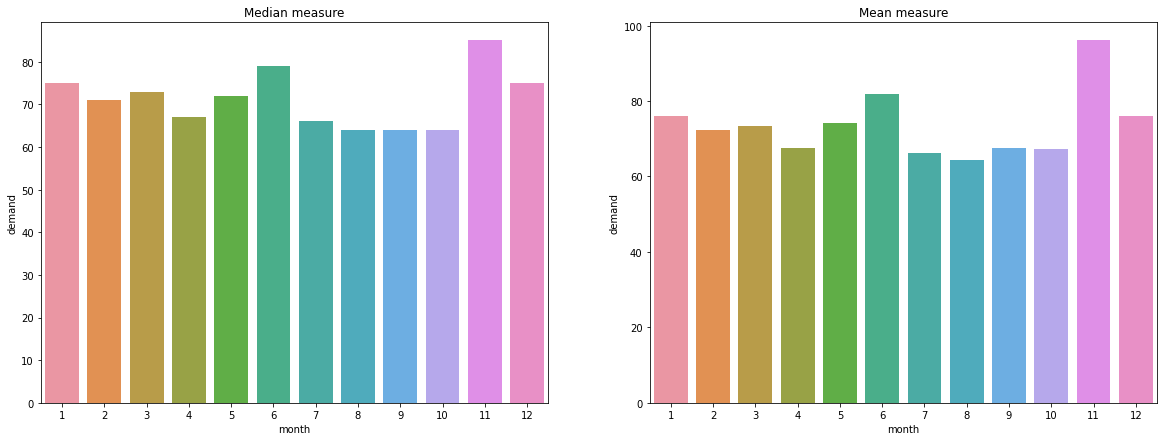

In [24]:
plt.figure(figsize  = (20, 7))
group_median = df.groupby('month', as_index = False)['demand'].median()
group_mean = df.groupby('month', as_index = False)['demand'].mean()
plt.subplot(1,2,1)
sns.barplot(data = group_median, x = 'month', y = 'demand')
plt.title('Median measure')

plt.subplot(1,2,2)
sns.barplot(data = group_mean, x = 'month', y = 'demand')
plt.title('Mean measure')

plt.show()

*observation* : **The month of november has seen the highest demand.** 

In [156]:
## divide the date into its respective quarter
df['quartor'] = df['date'].dt.quarter
df

,date,hour,demand,day,month,year,day_of_the_week,Season,quartor,cyclic_hours,type_of_day,isWeekend,hours_in_sin,hours_in_cos,month_in_sin,month_in_cos
0,2018-08-18,9,91,18,8,2018,0.283662,1,3,0.707107,5,1,0.707107,-0.707107,-0.866025,-0.5
1,2018-08-18,10,21,18,8,2018,0.283662,1,3,0.500000,5,1,0.500000,-0.866025,-0.866025,-0.5
2,2018-08-18,13,23,18,8,2018,0.283662,1,3,-0.258819,0,1,-0.258819,-0.965926,-0.866025,-0.5
3,2018-08-18,14,104,18,8,2018,0.283662,1,3,-0.500000,0,1,-0.500000,-0.866025,-0.866025,-0.5
4,2018-08-18,15,81,18,8,2018,0.283662,1,3,-0.707107,0,1,-0.707107,-0.707107,-0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021,0.960170,2,1,-0.965926,3,1,-0.965926,0.258819,0.866025,0.5
18243,2021-02-28,20,88,28,2,2021,0.960170,2,1,-0.866025,3,1,-0.866025,0.500000,0.866025,0.5
18244,2021-02-28,21,39,28,2,2021,0.960170,2,1,-0.707107,4,1,-0.707107,0.707107,0.866025,0.5
18245,2021-02-28,22,104,28,2,2021,0.960170,2,1,-0.500000,4,1,-0.500000,0.866025,0.866025,0.5


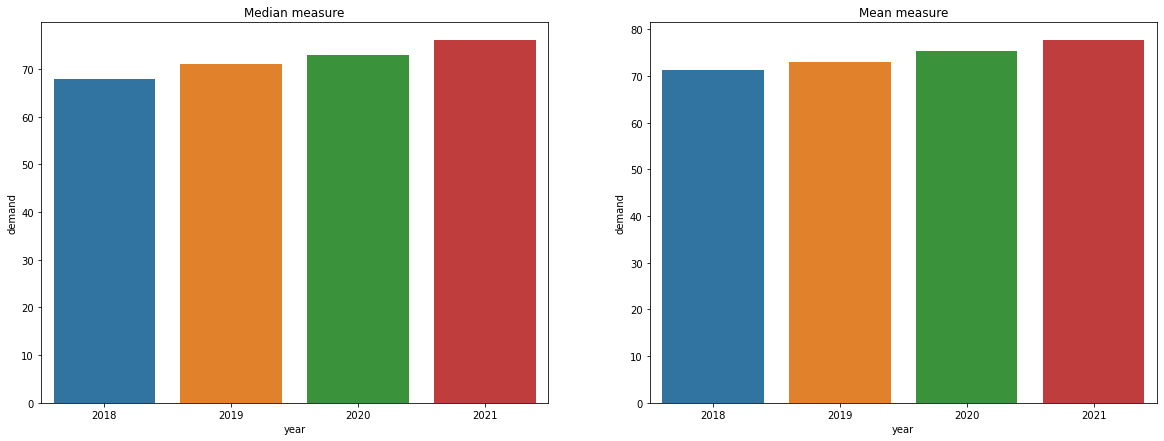

In [26]:
plt.figure(figsize  = (20, 7))
group_median = df.groupby('year', as_index = False)['demand'].median()
group_mean = df.groupby('year', as_index = False)['demand'].mean()
plt.subplot(1,2,1)
sns.barplot(data = group_median, x = 'year', y = 'demand')
plt.title('Median measure')

plt.subplot(1,2,2)
sns.barplot(data = group_mean, x = 'year', y = 'demand')
plt.title('Mean measure')

plt.show()

*Observation* : **the demand is increasing as the years goes by.**  

In [27]:
df['year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [28]:
df['month'].unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [29]:
df


,date,hour,demand,day,month,year,day_of_the_week,Season,quartor
0,2018-08-18,9,91,18,8,2018,5,Monsoon,3
1,2018-08-18,10,21,18,8,2018,5,Monsoon,3
2,2018-08-18,13,23,18,8,2018,5,Monsoon,3
3,2018-08-18,14,104,18,8,2018,5,Monsoon,3
4,2018-08-18,15,81,18,8,2018,5,Monsoon,3
...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021,6,Spring,1
18243,2021-02-28,20,88,28,2,2021,6,Spring,1
18244,2021-02-28,21,39,28,2,2021,6,Spring,1
18245,2021-02-28,22,104,28,2,2021,6,Spring,1


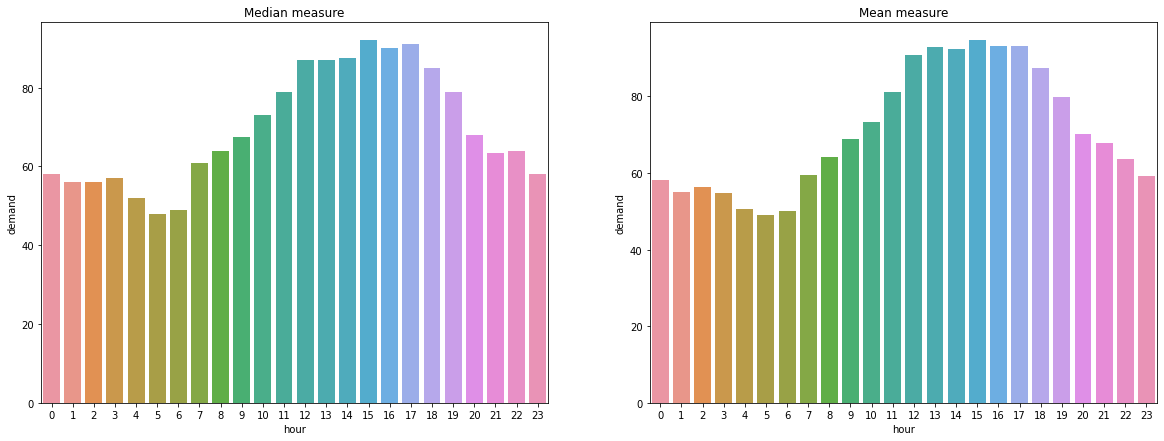

In [30]:
## what hour of the day is the demand high
plt.figure(figsize  = (20, 7))
group_median = df.groupby('hour', as_index = False)['demand'].median()
group_mean = df.groupby('hour', as_index = False)['demand'].mean()
plt.subplot(1,2,1)
sns.barplot(data = group_median, x = 'hour', y = 'demand')
plt.title('Median measure')

plt.subplot(1,2,2)
sns.barplot(data = group_mean, x = 'hour', y = 'demand')
plt.title('Mean measure')

plt.show()

 *observation* : **between 12 pm and 5 pm the demand is high and peaks @ 3 pm**

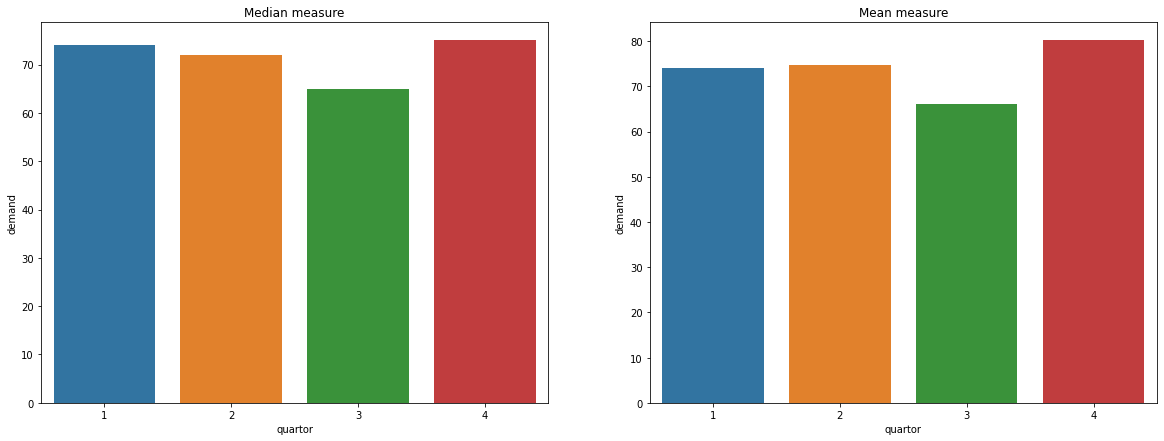

In [31]:
## trends in quarter
plt.figure(figsize  = (20, 7))
group_median = df.groupby('quartor', as_index = False)['demand'].median()
group_mean = df.groupby('quartor', as_index = False)['demand'].mean()
plt.subplot(1,2,1)
sns.barplot(data = group_median, x = 'quartor', y = 'demand')
plt.title('Median measure')

plt.subplot(1,2,2)
sns.barplot(data = group_mean, x = 'quartor', y = 'demand')
plt.title('Mean measure')

plt.show()

*observation* 

**the third qaurter has seen the lowest demand.**

In [ ]:
df['quartor'].unique()

In [32]:
import math 


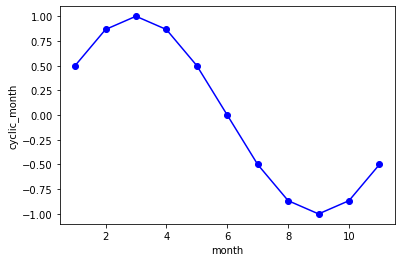

In [33]:
month = np.arange(1, 12)
month_cyclic = np.sin((2*math.pi/12.)*month)
plt.plot(month, month_cyclic, color = 'blue', marker = 'o')
plt.xlabel('month')
plt.ylabel('cyclic_month')
plt.show()

In [158]:
## convert hours to cyclic set
df['cyclic_hours'] = np.sin((2*math.pi/24.)*df['hour'])

In [ ]:
df

In [36]:
 df['Season'].unique()

array(['Monsoon', 'Autum', 'Winter', 'Spring', 'Summer'], dtype=object)

In [157]:
## function to convert time to its respective time of the day.(morning, evening etc.)
def DayType(hour):
    if hour in range(2, 6):
        return 'Early Morning'
    elif hour in range(6, 9):
        return 'Morning'
    elif hour in range(9, 12):
        return 'Late Morning'
    elif hour in range(12, 16):
        return 'Afternoon'
    elif hour in range(16, 18):
        return 'Early Evening'
    elif hour in range(18, 21):
        return 'Evening'
    elif hour in range(21, 23):
        return 'Late Evening'
    elif hour in [23, 0, 1]:
        return 'Night'
    else:
        return
    


In [38]:
df['type_of_day'] = df['hour'].map(lambda x : DayType(x))

In [39]:
df

,date,hour,demand,day,month,year,day_of_the_week,Season,quartor,cyclic_hours,type_of_day
0,2018-08-18,9,91,18,8,2018,5,Monsoon,3,0.707107,Late Morning
1,2018-08-18,10,21,18,8,2018,5,Monsoon,3,0.500000,Late Morning
2,2018-08-18,13,23,18,8,2018,5,Monsoon,3,-0.258819,Afternoon
3,2018-08-18,14,104,18,8,2018,5,Monsoon,3,-0.500000,Afternoon
4,2018-08-18,15,81,18,8,2018,5,Monsoon,3,-0.707107,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021,6,Spring,1,-0.965926,Evening
18243,2021-02-28,20,88,28,2,2021,6,Spring,1,-0.866025,Evening
18244,2021-02-28,21,39,28,2,2021,6,Spring,1,-0.707107,Late Evening
18245,2021-02-28,22,104,28,2,2021,6,Spring,1,-0.500000,Late Evening


In [40]:
df['isWeekend'] = df['day_of_the_week'].apply(lambda x : 1 if x > 4 else 0)

In [41]:
df['isWeekend'].unique()

array([1, 0], dtype=int64)

In [ ]:
df

In [42]:
## normalizing cyclic features
df['hours_in_sin'] = np.sin((2*math.pi/24.)*df['hour'])
df['hours_in_cos'] = np.cos((2*math.pi/24.)*df['hour'])
df['month_in_sin'] = np.sin((2*math.pi/12.)*df['month'])
df['month_in_cos'] = np.cos((2*math.pi/12.)*df['month'])
df['day_of_the_week'] = np.cos(df['day_of_the_week'])

In [43]:
df

,date,hour,demand,day,month,year,day_of_the_week,Season,quartor,cyclic_hours,type_of_day,isWeekend,hours_in_sin,hours_in_cos,month_in_sin,month_in_cos
0,2018-08-18,9,91,18,8,2018,0.283662,Monsoon,3,0.707107,Late Morning,1,0.707107,-0.707107,-0.866025,-0.5
1,2018-08-18,10,21,18,8,2018,0.283662,Monsoon,3,0.500000,Late Morning,1,0.500000,-0.866025,-0.866025,-0.5
2,2018-08-18,13,23,18,8,2018,0.283662,Monsoon,3,-0.258819,Afternoon,1,-0.258819,-0.965926,-0.866025,-0.5
3,2018-08-18,14,104,18,8,2018,0.283662,Monsoon,3,-0.500000,Afternoon,1,-0.500000,-0.866025,-0.866025,-0.5
4,2018-08-18,15,81,18,8,2018,0.283662,Monsoon,3,-0.707107,Afternoon,1,-0.707107,-0.707107,-0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021,0.960170,Spring,1,-0.965926,Evening,1,-0.965926,0.258819,0.866025,0.5
18243,2021-02-28,20,88,28,2,2021,0.960170,Spring,1,-0.866025,Evening,1,-0.866025,0.500000,0.866025,0.5
18244,2021-02-28,21,39,28,2,2021,0.960170,Spring,1,-0.707107,Late Evening,1,-0.707107,0.707107,0.866025,0.5
18245,2021-02-28,22,104,28,2,2021,0.960170,Spring,1,-0.500000,Late Evening,1,-0.500000,0.866025,0.866025,0.5


In [ ]:
df['month_in_sin'] .unique()

In [ ]:
df[df['month'] == 10]

In [ ]:
df['Season'].unique()

In [159]:
## encode season to its numeric value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Season'])
df['Season'] = le.transform(df['Season'])

In [ ]:
df

In [45]:
df['Season'].unique()

array([1, 0, 4, 2, 3])

In [160]:
## encode day type to its numeric value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type_of_day'])
df['type_of_day'] = le.transform(df['type_of_day'])

In [47]:
y = df['demand'].copy()
X = df.drop('demand',axis=1).copy()

In [ ]:
X['date'] ## drop it

In [48]:
## dropping the date value
X.drop('date', axis = 1, inplace = True)

In [ ]:
X.dtypes

In [49]:
## perform variation inflation factor for multicollinearity amongst the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Colums'] = X.columns


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [50]:
vif.sort_values('VIF', ascending = False)

,VIF,Colums
7,inf,cyclic_hours
10,inf,hours_in_sin
6,128.607580,quartor
2,85.730866,month
3,33.536344,year
0,12.101391,hour
8,6.118046,type_of_day
5,5.137422,Season
1,4.251803,day
12,4.122451,month_in_sin


*observation*

**since Quartor, month, year and hour have very high variation inflation factor hence dropping the respective columns**

In [51]:
X.drop(['quartor', 'month', 'year', 'hour'], axis = 1, inplace = True)

In [52]:
X

,day,day_of_the_week,Season,cyclic_hours,type_of_day,isWeekend,hours_in_sin,hours_in_cos,month_in_sin,month_in_cos
0,18,0.283662,1,0.707107,5,1,0.707107,-0.707107,-0.866025,-0.5
1,18,0.283662,1,0.500000,5,1,0.500000,-0.866025,-0.866025,-0.5
2,18,0.283662,1,-0.258819,0,1,-0.258819,-0.965926,-0.866025,-0.5
3,18,0.283662,1,-0.500000,0,1,-0.500000,-0.866025,-0.866025,-0.5
4,18,0.283662,1,-0.707107,0,1,-0.707107,-0.707107,-0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...
18242,28,0.960170,2,-0.965926,3,1,-0.965926,0.258819,0.866025,0.5
18243,28,0.960170,2,-0.866025,3,1,-0.866025,0.500000,0.866025,0.5
18244,28,0.960170,2,-0.707107,4,1,-0.707107,0.707107,0.866025,0.5
18245,28,0.960170,2,-0.500000,4,1,-0.500000,0.866025,0.866025,0.5


In [53]:
y

0         91
1         21
2         23
3        104
4         81
        ... 
18242     95
18243     88
18244     39
18245    104
18246     85
Name: demand, Length: 18247, dtype: int64

In [54]:
## training and test data splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


### linear regression

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_lr_pred = lin_reg.predict(X_test)

In [56]:
## RSME measure and R2 score
from sklearn.metrics import mean_squared_error, r2_score

print('RMSE value : ',mean_squared_error(y_test, y_lr_pred))
print('R2 score : ', r2_score(y_test, y_lr_pred))

RMSE value :  1496.715586618401
R2 score :  0.1620656559346002


### decision tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state = 42)
dt_reg.fit(X_train, y_train)
y_dt_reg = dt_reg.predict(X_test)


In [58]:
## RSME measure and R2 score
print('RMSE value : ',mean_squared_error(y_test, y_dt_reg))
print('R2 score : ', r2_score(y_test, y_dt_reg))

RMSE value :  2154.8920547945204
R2 score :  -0.20641361432307614


### random forest

In [59]:
## using bagging ensemle learning 
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, max_depth = 3, random_state = 42)
rf_reg.fit(X_train, y_train)
y_rf_reg = rf_reg.predict(X_test)



In [60]:
## RSME measure and R2 score
print('RMSE value : ',mean_squared_error(y_test, y_rf_reg))
print('R2 score : ', r2_score(y_test, y_rf_reg))

RMSE value :  1477.4185173824644
R2 score :  0.1728690959449578


### Xgboost

In [61]:
from xgboost import XGBRegressor

In [62]:
xgb = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)

In [63]:
## RSME measure and R2 score
print('RMSE value : ',mean_squared_error(y_test, y_xgb))
print('R2 score : ', r2_score(y_test, y_xgb))

RMSE value :  1180.5180934701264
R2 score :  0.33908842591519706


### Light Gradient Boosting

In [66]:
from lightgbm import LGBMRegressor
lgm_reg = LGBMRegressor()
lgm_reg.fit(X_train, y_train)
y_lgm_reg = lgm_reg.predict(X_test)


In [68]:
print('RMSE value : ',mean_squared_error(y_test, y_lgm_reg))
print('R2 score : ', r2_score(y_test, y_lgm_reg))

RMSE value :  1133.1556635813847
R2 score :  0.3656042228889107


*Observation* 

1. from the above analysis we see that Light Gradient boosting gives a better performance when compared to  Xgboost, random forest, decision tree and linear regression

2. decision tree performed the worst. 


In [ ]:
#Predciting the values on unseen test data

In [134]:
test_data = pd.read_csv('test_6QvDdzb.csv') 

In [135]:
test_data.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [136]:
test_data.isna().sum()

date    0
hour    0
dtype: int64

In [137]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['day'] = test_data['date'].map(lambda x : x.day)
test_data['month'] = test_data['date'].map(lambda x : x.month)
test_data['year'] = test_data['date'].map(lambda x : x.year)
test_data['day_of_the_week'] = test_data['date'].map(lambda x : x .dayofweek)

In [138]:
test_data

,date,hour,day,month,year,day_of_the_week
0,2021-03-01,0,1,3,2021,0
1,2021-03-01,1,1,3,2021,0
2,2021-03-01,2,1,3,2021,0
3,2021-03-01,3,1,3,2021,0
4,2021-03-01,5,1,3,2021,0
...,...,...,...,...,...,...
7645,2022-03-28,19,28,3,2022,0
7646,2022-03-28,20,28,3,2022,0
7647,2022-03-28,21,28,3,2022,0
7648,2022-03-28,22,28,3,2022,0


In [139]:
test_data['Season'] = test_data['month'].map(lambda x : SeasonSelector(x))
test_data['quartor'] = test_data['date'].dt.quarter
test_data['type_of_day'] = test_data['hour'].map(lambda x : DayType(x))
test_data['isWeekend'] = test_data['day_of_the_week'].apply(lambda x : 1 if x > 4 else 0)

In [140]:
test_data['hours_in_sin'] = np.sin((2*math.pi/24.)*test_data['hour'])
test_data['hours_in_cos'] = np.cos((2*math.pi/24.)*test_data['hour'])
test_data['month_in_sin'] = np.sin((2*math.pi/12.)*test_data['month'])
test_data['month_in_cos'] = np.cos((2*math.pi/12.)*test_data['month'])
test_data['day_of_the_week'] = np.cos(test_data['day_of_the_week'])
test_data['cyclic_hours'] = np.sin((2*math.pi/24.)*test_data['hour'])

In [141]:
test_data

,date,hour,day,month,year,day_of_the_week,Season,quartor,type_of_day,isWeekend,hours_in_sin,hours_in_cos,month_in_sin,month_in_cos,cyclic_hours
0,2021-03-01,0,1,3,2021,1.0,Spring,1,Night,0,0.000000,1.000000,1.0,6.123234e-17,0.000000
1,2021-03-01,1,1,3,2021,1.0,Spring,1,Night,0,0.258819,0.965926,1.0,6.123234e-17,0.258819
2,2021-03-01,2,1,3,2021,1.0,Spring,1,Early Morning,0,0.500000,0.866025,1.0,6.123234e-17,0.500000
3,2021-03-01,3,1,3,2021,1.0,Spring,1,Early Morning,0,0.707107,0.707107,1.0,6.123234e-17,0.707107
4,2021-03-01,5,1,3,2021,1.0,Spring,1,Early Morning,0,0.965926,0.258819,1.0,6.123234e-17,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,2022-03-28,19,28,3,2022,1.0,Spring,1,Evening,0,-0.965926,0.258819,1.0,6.123234e-17,-0.965926
7646,2022-03-28,20,28,3,2022,1.0,Spring,1,Evening,0,-0.866025,0.500000,1.0,6.123234e-17,-0.866025
7647,2022-03-28,21,28,3,2022,1.0,Spring,1,Late Evening,0,-0.707107,0.707107,1.0,6.123234e-17,-0.707107
7648,2022-03-28,22,28,3,2022,1.0,Spring,1,Late Evening,0,-0.500000,0.866025,1.0,6.123234e-17,-0.500000


In [142]:
le.fit(test_data['Season'])
test_data['Season'] = le.transform(test_data['Season'])

In [143]:
test_data

,date,hour,day,month,year,day_of_the_week,Season,quartor,type_of_day,isWeekend,hours_in_sin,hours_in_cos,month_in_sin,month_in_cos,cyclic_hours
0,2021-03-01,0,1,3,2021,1.0,2,1,Night,0,0.000000,1.000000,1.0,6.123234e-17,0.000000
1,2021-03-01,1,1,3,2021,1.0,2,1,Night,0,0.258819,0.965926,1.0,6.123234e-17,0.258819
2,2021-03-01,2,1,3,2021,1.0,2,1,Early Morning,0,0.500000,0.866025,1.0,6.123234e-17,0.500000
3,2021-03-01,3,1,3,2021,1.0,2,1,Early Morning,0,0.707107,0.707107,1.0,6.123234e-17,0.707107
4,2021-03-01,5,1,3,2021,1.0,2,1,Early Morning,0,0.965926,0.258819,1.0,6.123234e-17,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,2022-03-28,19,28,3,2022,1.0,2,1,Evening,0,-0.965926,0.258819,1.0,6.123234e-17,-0.965926
7646,2022-03-28,20,28,3,2022,1.0,2,1,Evening,0,-0.866025,0.500000,1.0,6.123234e-17,-0.866025
7647,2022-03-28,21,28,3,2022,1.0,2,1,Late Evening,0,-0.707107,0.707107,1.0,6.123234e-17,-0.707107
7648,2022-03-28,22,28,3,2022,1.0,2,1,Late Evening,0,-0.500000,0.866025,1.0,6.123234e-17,-0.500000


In [144]:
le = LabelEncoder()
le.fit(test_data['type_of_day'])
test_data['type_of_day'] = le.transform(test_data['type_of_day'])

In [145]:
test_data

,date,hour,day,month,year,day_of_the_week,Season,quartor,type_of_day,isWeekend,hours_in_sin,hours_in_cos,month_in_sin,month_in_cos,cyclic_hours
0,2021-03-01,0,1,3,2021,1.0,2,1,7,0,0.000000,1.000000,1.0,6.123234e-17,0.000000
1,2021-03-01,1,1,3,2021,1.0,2,1,7,0,0.258819,0.965926,1.0,6.123234e-17,0.258819
2,2021-03-01,2,1,3,2021,1.0,2,1,2,0,0.500000,0.866025,1.0,6.123234e-17,0.500000
3,2021-03-01,3,1,3,2021,1.0,2,1,2,0,0.707107,0.707107,1.0,6.123234e-17,0.707107
4,2021-03-01,5,1,3,2021,1.0,2,1,2,0,0.965926,0.258819,1.0,6.123234e-17,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,2022-03-28,19,28,3,2022,1.0,2,1,3,0,-0.965926,0.258819,1.0,6.123234e-17,-0.965926
7646,2022-03-28,20,28,3,2022,1.0,2,1,3,0,-0.866025,0.500000,1.0,6.123234e-17,-0.866025
7647,2022-03-28,21,28,3,2022,1.0,2,1,4,0,-0.707107,0.707107,1.0,6.123234e-17,-0.707107
7648,2022-03-28,22,28,3,2022,1.0,2,1,4,0,-0.500000,0.866025,1.0,6.123234e-17,-0.500000


In [146]:
test_data.drop(['quartor', 'month', 'year', 'hour'], axis = 1, inplace = True)
test_data

,date,day,day_of_the_week,Season,type_of_day,isWeekend,hours_in_sin,hours_in_cos,month_in_sin,month_in_cos,cyclic_hours
0,2021-03-01,1,1.0,2,7,0,0.000000,1.000000,1.0,6.123234e-17,0.000000
1,2021-03-01,1,1.0,2,7,0,0.258819,0.965926,1.0,6.123234e-17,0.258819
2,2021-03-01,1,1.0,2,2,0,0.500000,0.866025,1.0,6.123234e-17,0.500000
3,2021-03-01,1,1.0,2,2,0,0.707107,0.707107,1.0,6.123234e-17,0.707107
4,2021-03-01,1,1.0,2,2,0,0.965926,0.258819,1.0,6.123234e-17,0.965926
...,...,...,...,...,...,...,...,...,...,...,...
7645,2022-03-28,28,1.0,2,3,0,-0.965926,0.258819,1.0,6.123234e-17,-0.965926
7646,2022-03-28,28,1.0,2,3,0,-0.866025,0.500000,1.0,6.123234e-17,-0.866025
7647,2022-03-28,28,1.0,2,4,0,-0.707107,0.707107,1.0,6.123234e-17,-0.707107
7648,2022-03-28,28,1.0,2,4,0,-0.500000,0.866025,1.0,6.123234e-17,-0.500000


In [148]:
test_data.drop('date', axis = 1, inplace = True)

In [149]:
y_test = lgm_reg.predict(test_data)

In [150]:
file = pd.read_csv('test_6QvDdzb.csv') 

In [151]:
file

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [152]:
file['demand'] = y_test

In [153]:
file

,date,hour,demand
0,2021-03-01,0,64.672607
1,2021-03-01,1,95.270324
2,2021-03-01,2,95.270324
3,2021-03-01,3,103.030624
4,2021-03-01,5,103.030624
...,...,...,...
7645,2022-03-28,19,80.202317
7646,2022-03-28,20,67.146842
7647,2022-03-28,21,67.146842
7648,2022-03-28,22,65.579692


In [154]:
file.to_csv('car_demand_predict.csv')